In [6]:
import pickle
from pyteomics import pylab_aux as pa, usi
import matplotlib.pyplot as plt
from matchms import Scores, Spectrum
from matchms.similarity import CosineGreedy
from matchms.filtering import default_filters
import matplotlib.pyplot as plt
import numpy as np

In [7]:
test_theospecs = pickle.load(open('../data/test/theospec.pkl', 'rb'))
test_spectrums = pickle.load(open('../data/test/spectrum.pkl', 'rb'))

In [8]:
# Gives filtered arrays based on ion_info
def select_ion_data(mz_arr, intensity_arr, ion_info, select_ions):
    filtered_mz_arr=[]
    filtered_intensity_arr=[]
    for x, y, z in zip(mz_arr, intensity_arr, ion_info):
        if z[0] in select_ions:
            filtered_mz_arr.append(x)
            filtered_intensity_arr.append(y)

    return filtered_mz_arr, filtered_intensity_arr

In [9]:
def plot_spectrums(mzml_file, spectrums, plot_filtered=False, ion_list=[], classification=None):
    for (scan_num, peptide) in spectrums:
        # Get actual spectrum from scan
        mz_actual = test_spectrums[mzml_file][scan_num]['mz_arr']
        intensity_actual = test_spectrums[mzml_file][scan_num]['intensity_arr']

        mz_actual = np.array([float(x) for x in mz_actual])
        intensity_actual = np.array([float(x) for x in intensity_actual])

        spectrum_actual = Spectrum(mz=mz_actual,
                            intensities=intensity_actual,
                            metadata={'id': 'theospec'})
        # spectrum_actual = default_filters(spectrum_actual)
        
        # Get theoretical spectrum from peptide
        mz_theo = test_theospecs[peptide]['mz_arr']
        intensity_theo = test_theospecs[peptide]['intensity_arr']
        ion_info_theo = test_theospecs[peptide]['ion_name_arr']

        mz_theo = np.array([float(x) for x in mz_theo])
        intensity_theo = np.array([float(x) for x in intensity_theo])

        spectrum_theo = Spectrum(mz=mz_theo,
                        intensities=intensity_theo,
                        metadata={'id': 'theospec'})
        # spectrum_theo = default_filters(spectrum_theo)

        # Filter theoretical spectrum for b and y ions
        if plot_filtered:
            mz_theo_filtered, intensity_theo_filtered = select_ion_data(mz_theo, intensity_theo, ion_info_theo, ion_list )

            mz_theo_filtered = np.array([float(x) for x in mz_theo_filtered])
            intensity_theo_filtered = np.array([float(x) for x in intensity_theo_filtered])

            spectrum_theo_filtered = Spectrum(mz=mz_theo_filtered,
                            intensities=intensity_theo_filtered,
                            metadata={'id': 'theospec'})
        
        # Calculate cosine similarity between the 2 spectra
        cosine_greedy = CosineGreedy(tolerance=0.2)
        score_orig = cosine_greedy.pair(spectrum_actual, spectrum_theo) 
        if plot_filtered:
            score_theo = cosine_greedy.pair(spectrum_actual, spectrum_theo_filtered)
        
        # Actual vs orig theo
        spectrum_actual.plot_against(spectrum_theo)
        plt.title(f"""Scan: {scan_num}
            Peptide Match: {peptide}
            cos score: {score_orig['score']:.2f} | matches: {score_orig['matches']} ({score_orig['matches'] / len(spectrum_theo.peaks) * 100:.2f}%)
            {f'Classification: {classification}' if classification else ""}""")
        plt.savefig(f'../data/eda/0602_spectrum_classifications/{classification}_{scan_num}_{peptide}_all-ions.png', bbox_inches='tight')
        # plt.show()

        if plot_filtered:
            # Actual vs filtered theo
            spectrum_actual.plot_against(spectrum_theo_filtered)
            plt.title(f"""Scan: {scan_num}
                Peptide Match: {peptide}
                cos score: {score_theo['score']:.2f} | matches: {score_theo['matches']} ({score_theo['matches'] / len(spectrum_theo.peaks) * 100:.2f}%)
                Filtered for {ion_list} ions
                {f'Classification: {classification}' if classification else ""}""")
            plt.savefig(f'../data/eda/0602_spectrum_classifications/{classification}_{scan_num}_{peptide}_ions-{ion_list}.png', bbox_inches='tight')
            # plt.show()
        
        print("-----------------------------------------------")


2023-06-04 02:06:06,382:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-06-04 02:06:06,383:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
-----------------------------------------------
2023-06-04 02:06:08,360:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-06-04 02:06:08,361:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
-----------------------------------------------
2023-06-04 02:06:08,744:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-06-04 02:06:08,745:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
-----------------------------------------------
2023-06-04 02:06:10,037:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-06-04 02:06:10,037:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
-----------------------------------------------
2023-06-04 02:06:10,348:WARNING:matchms:add_precursor_mz:No precursor_mz

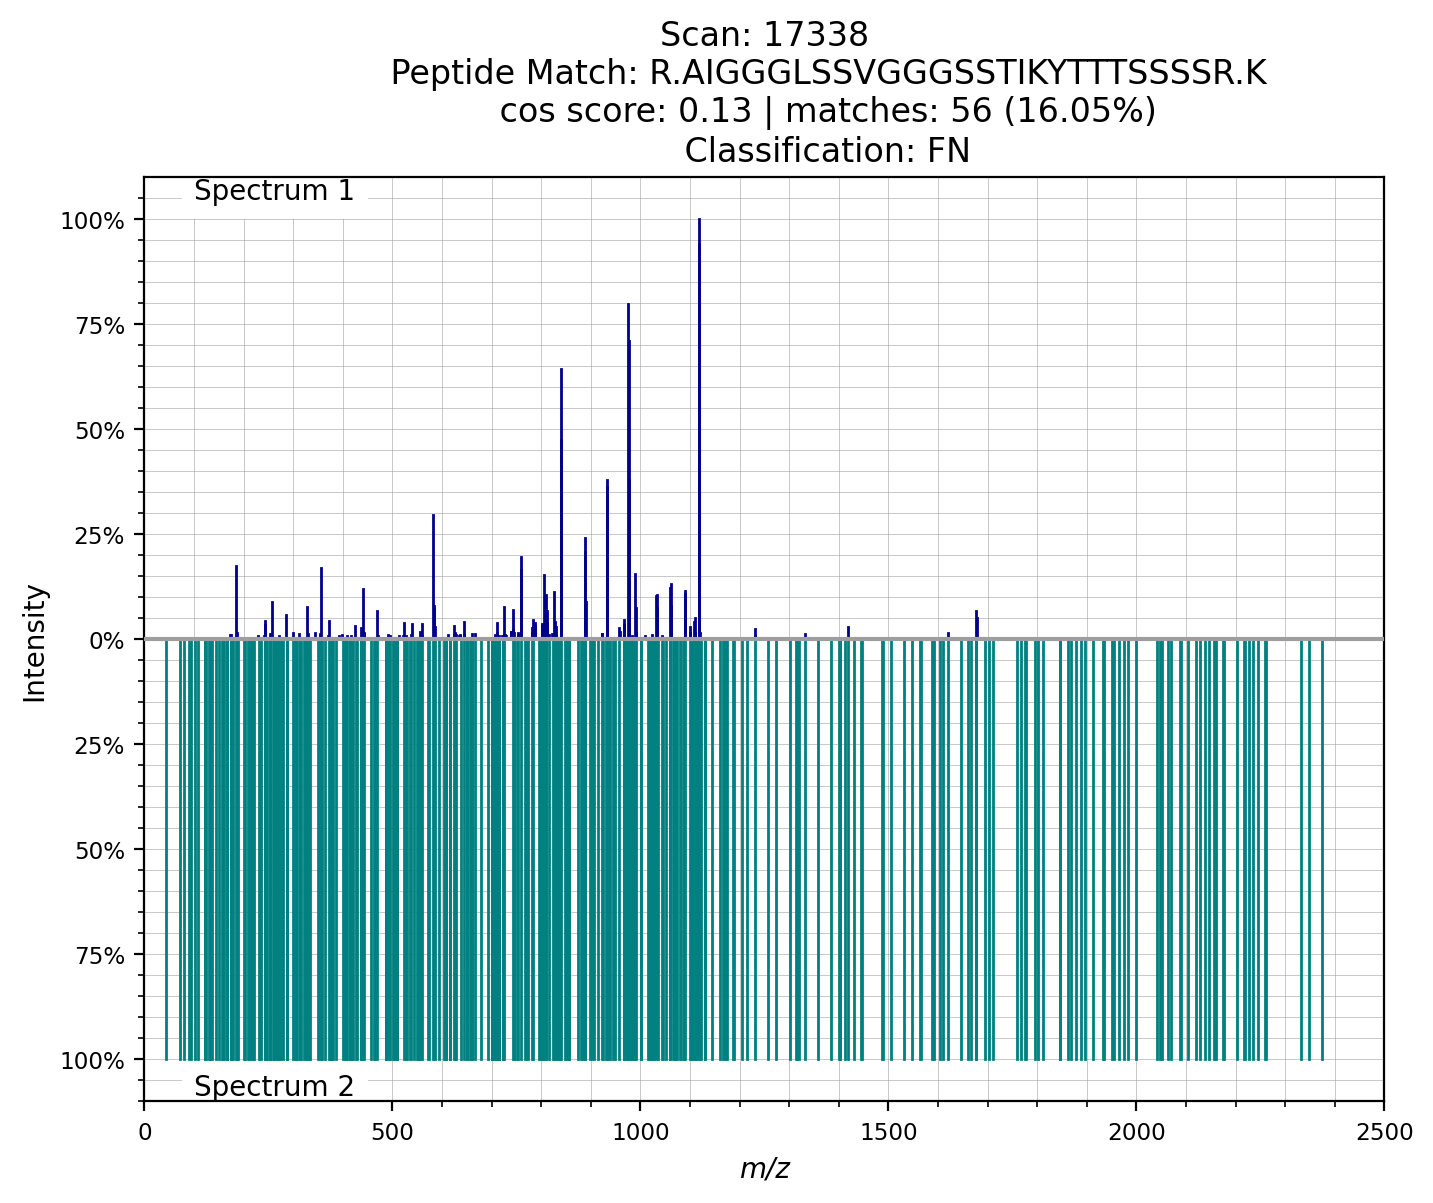

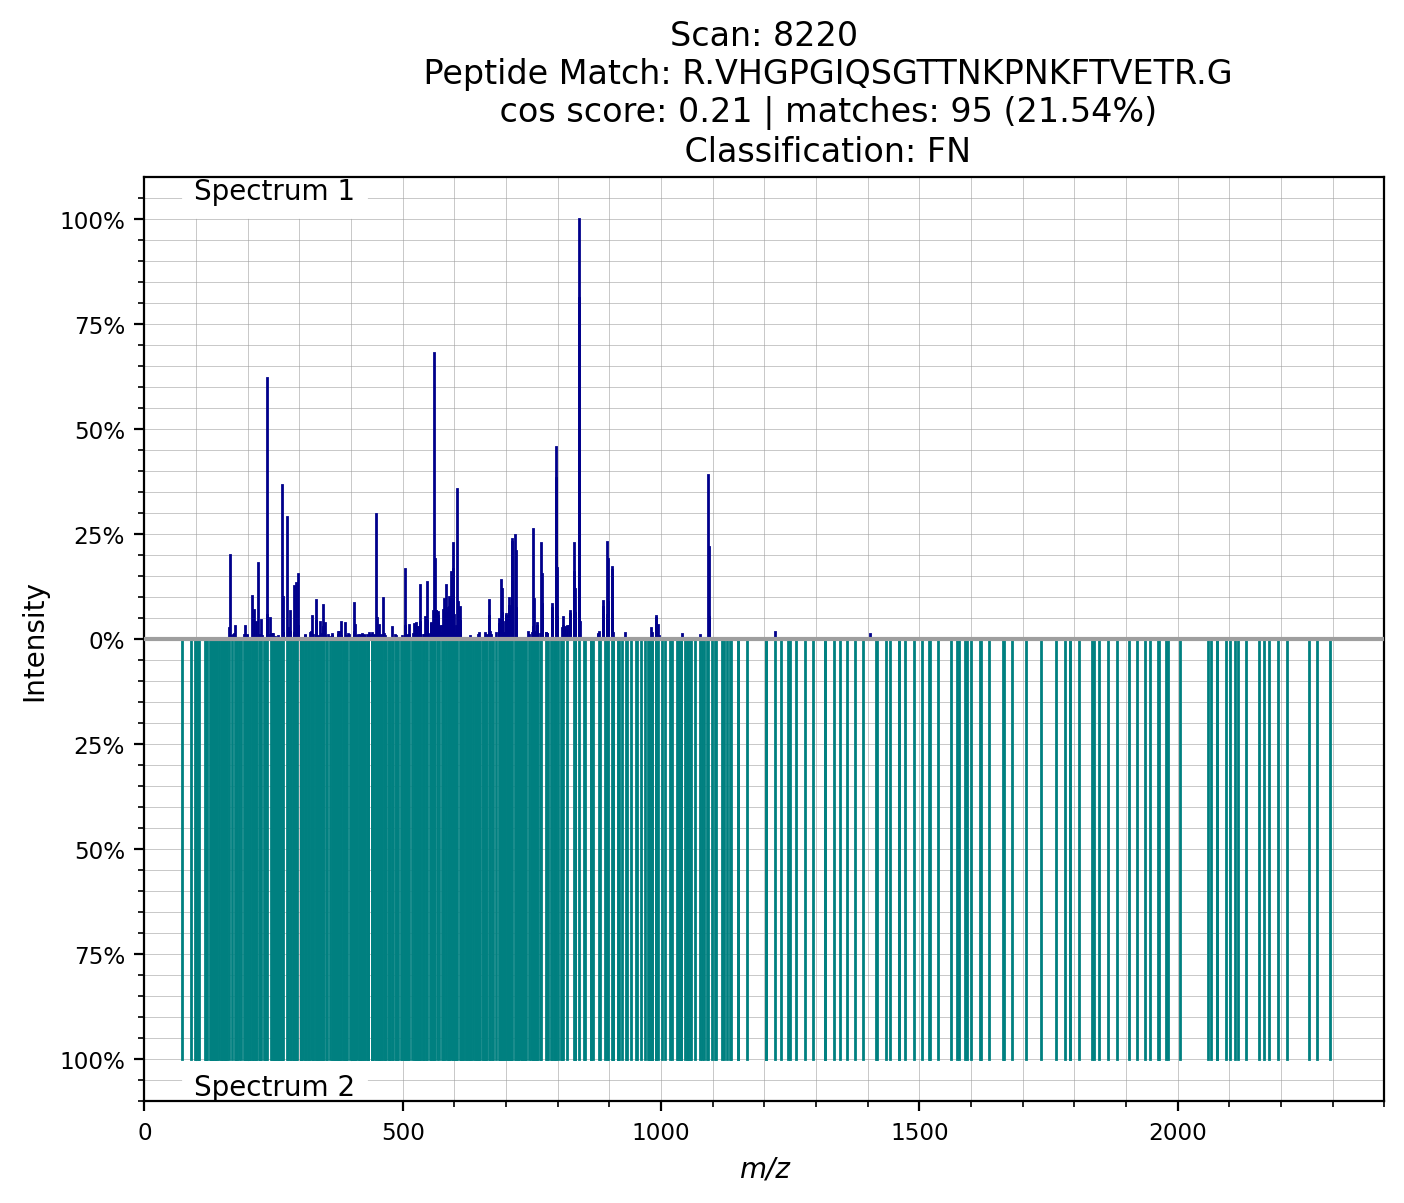

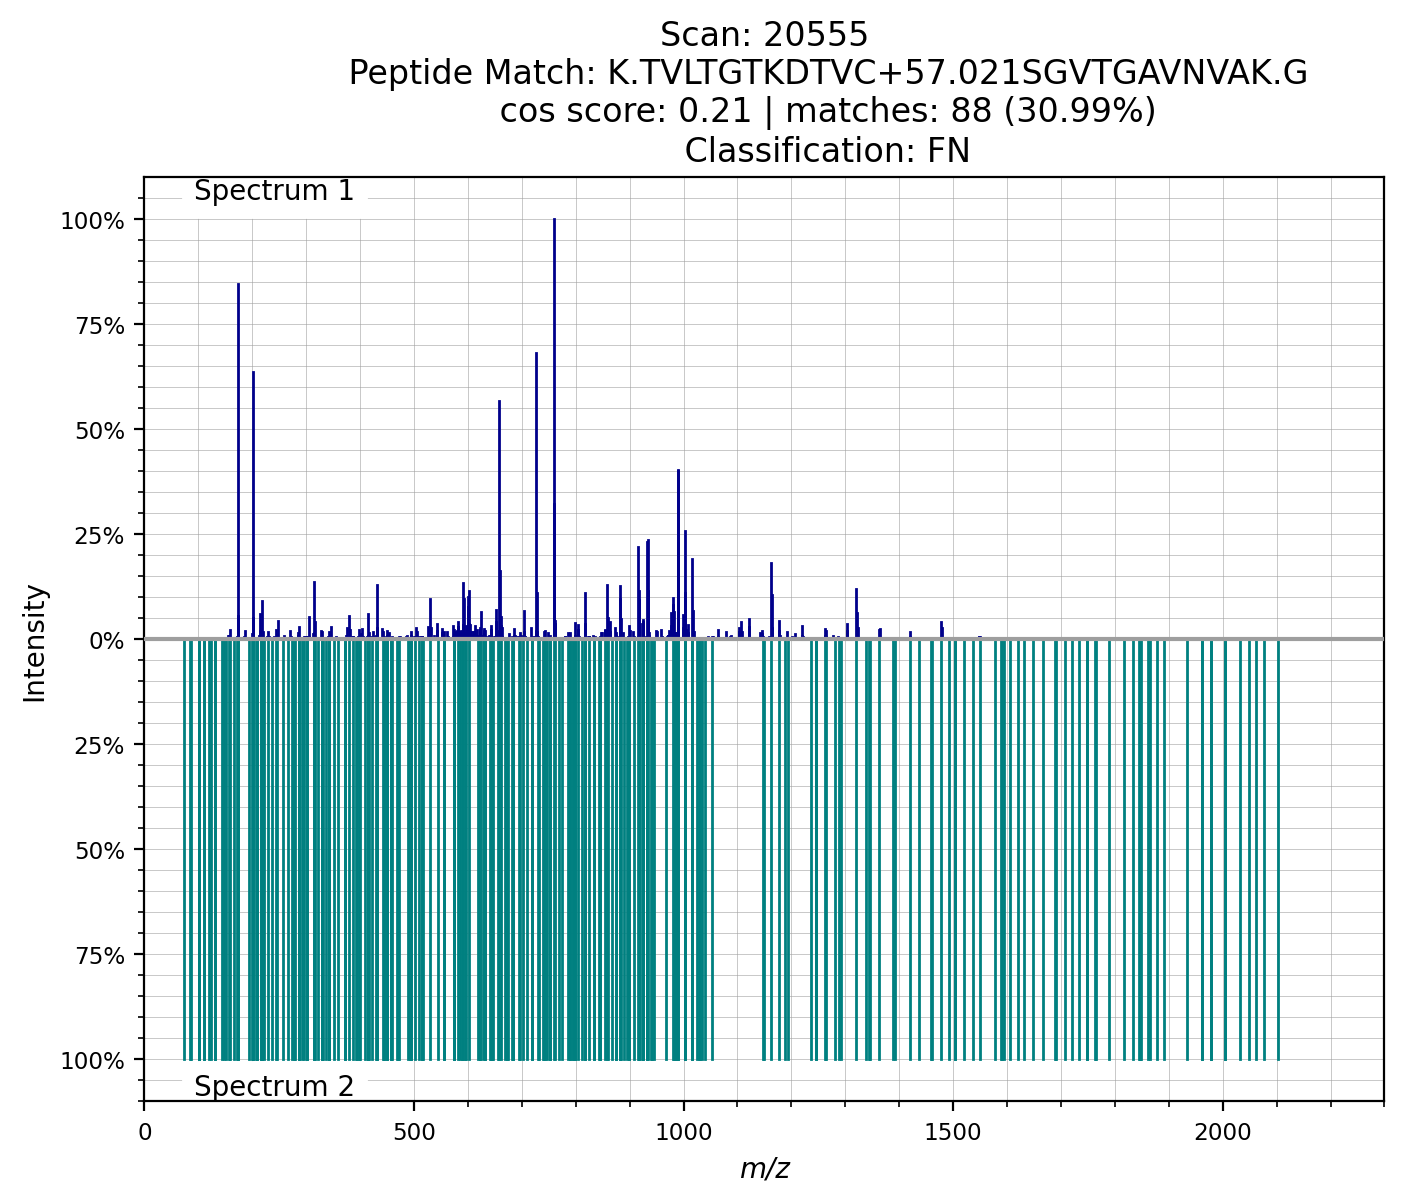

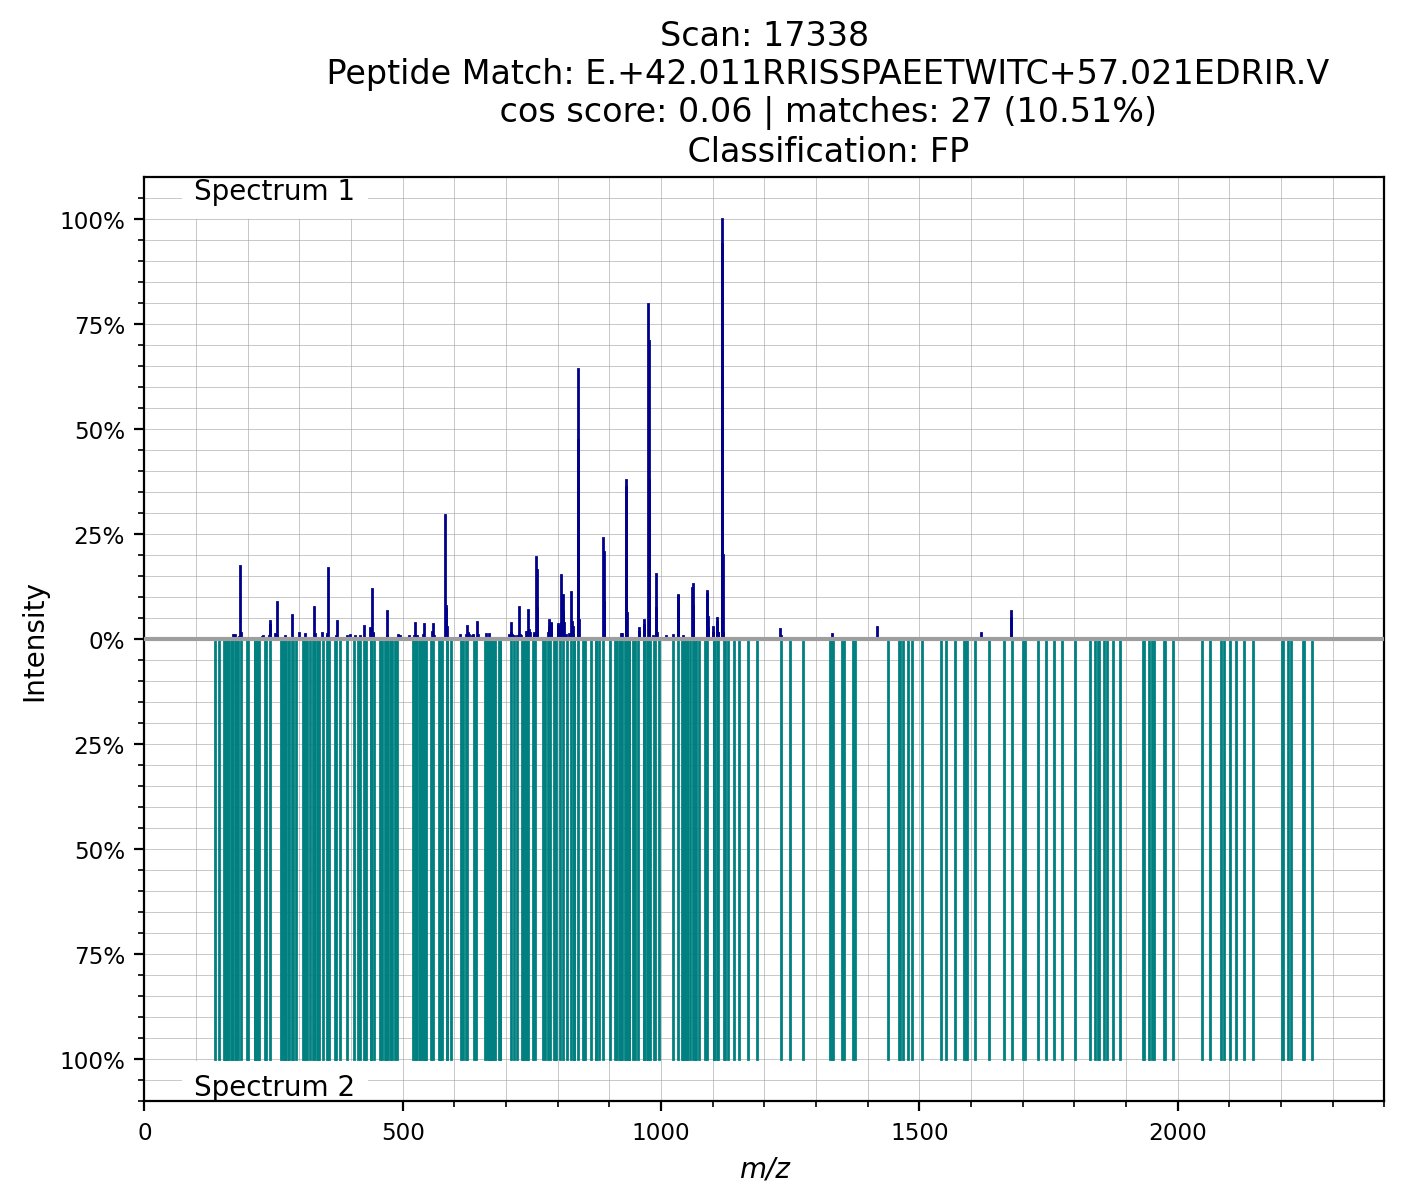

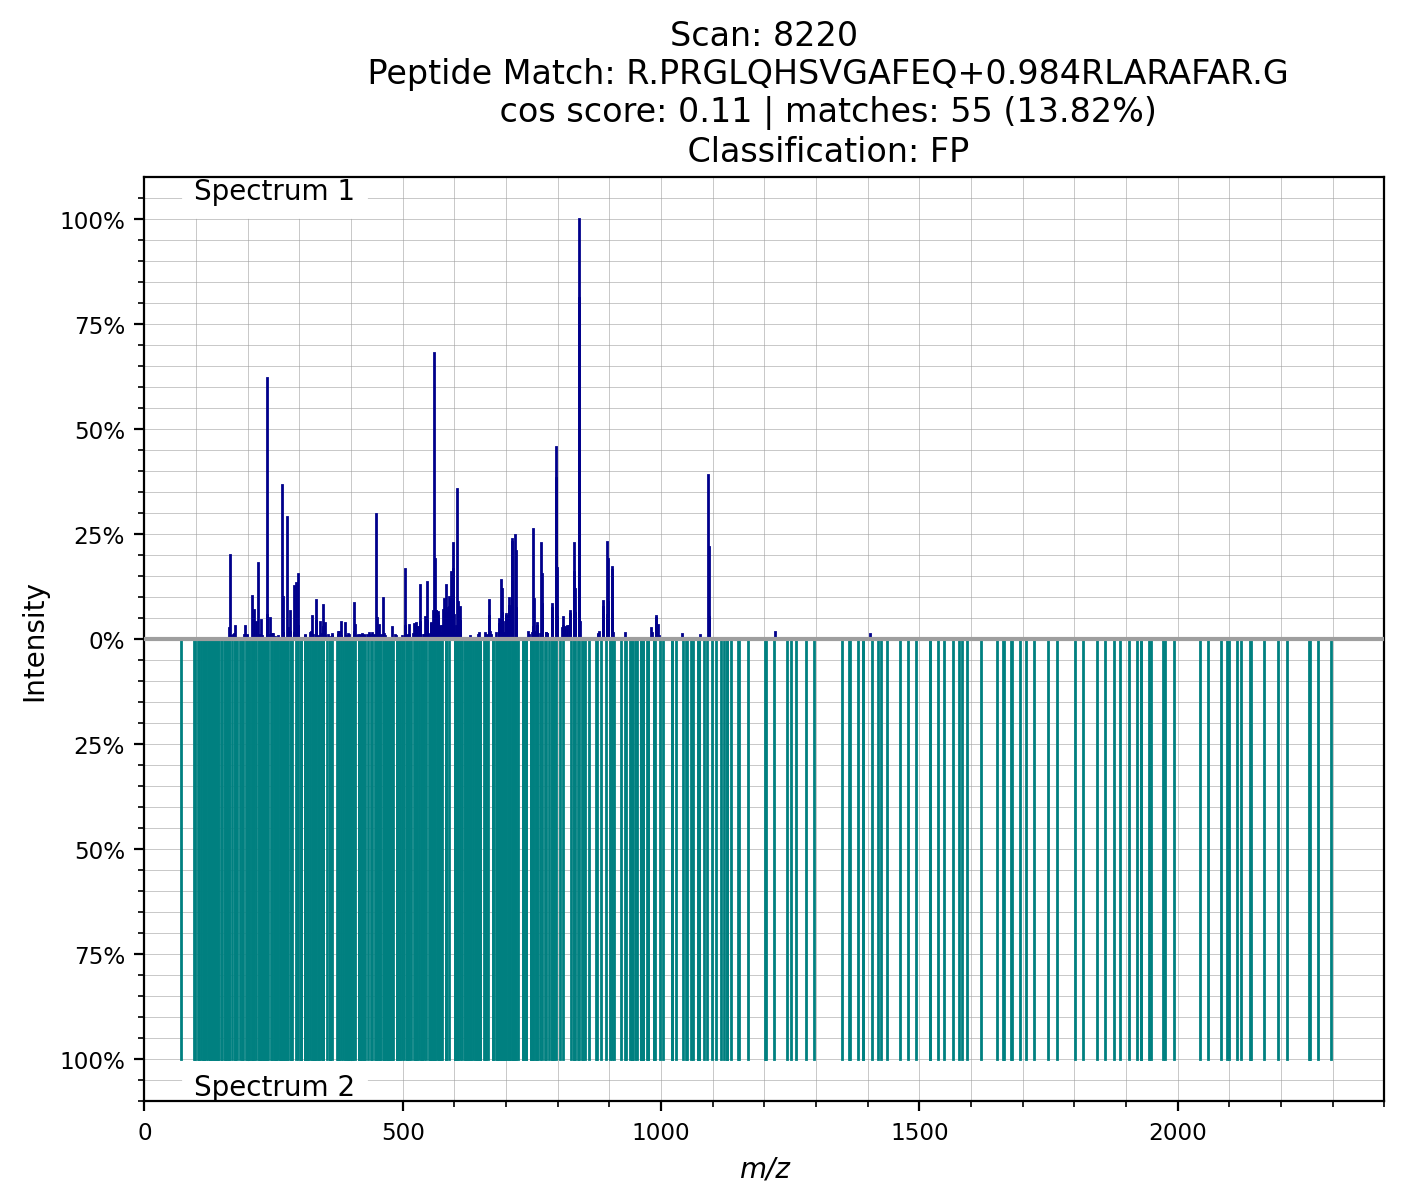

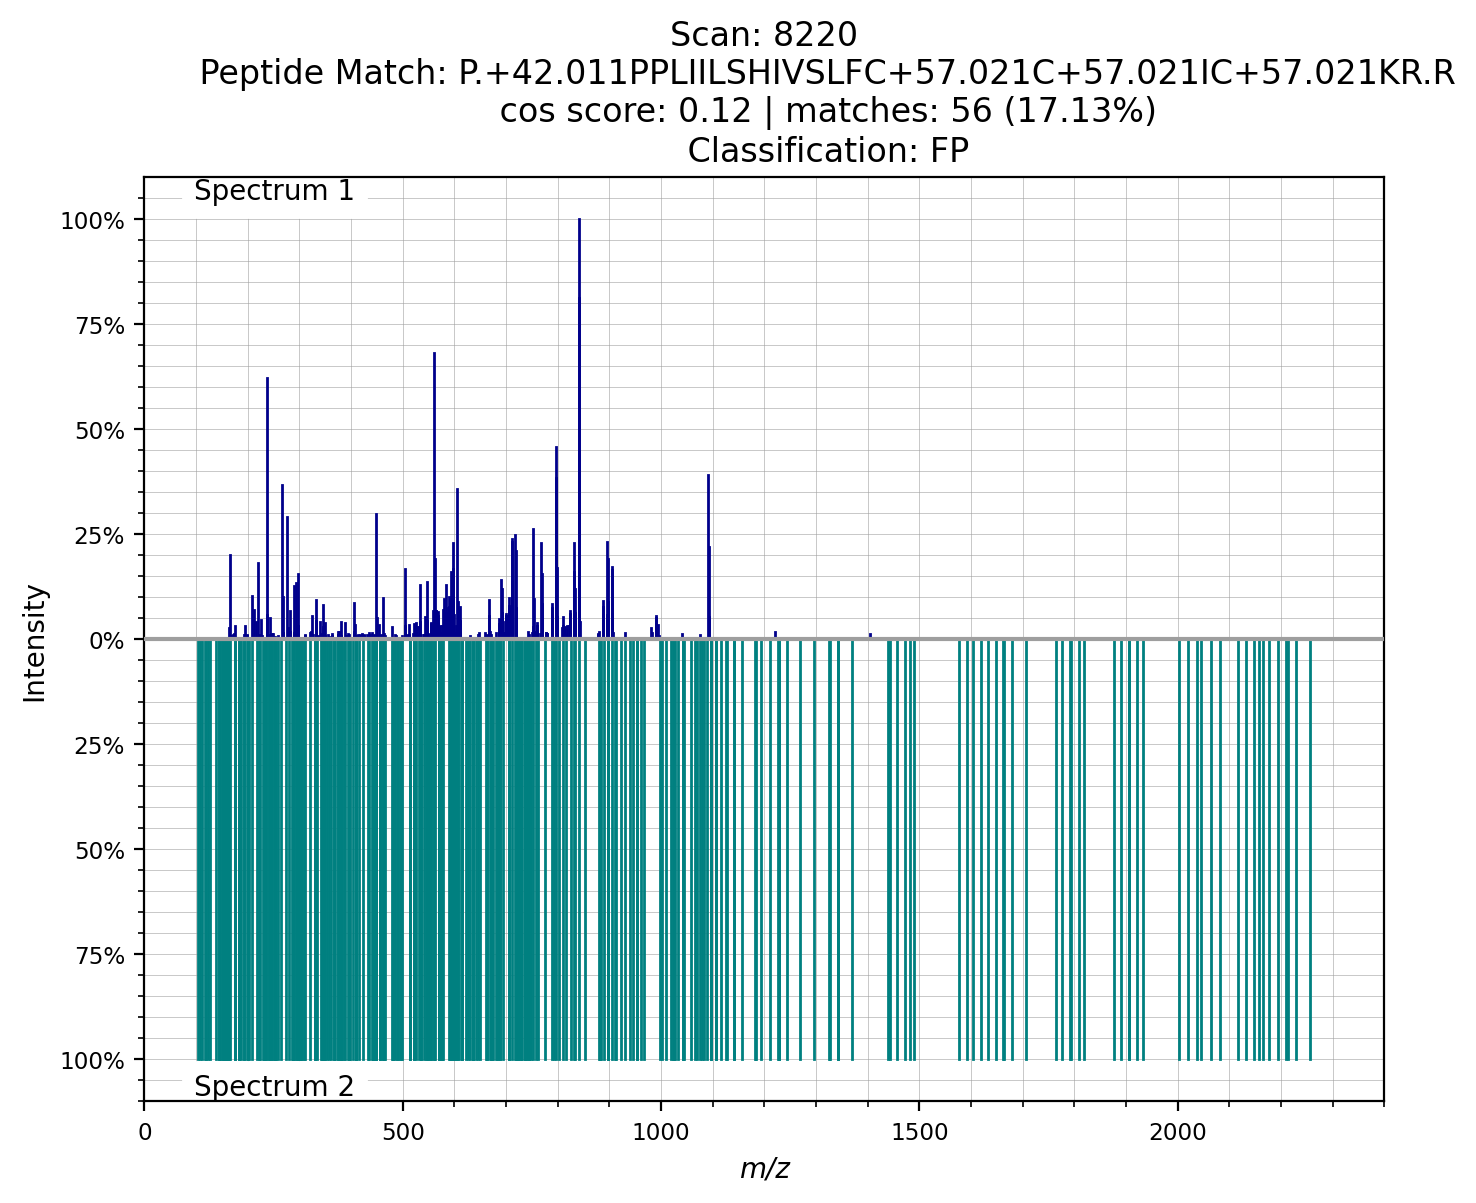

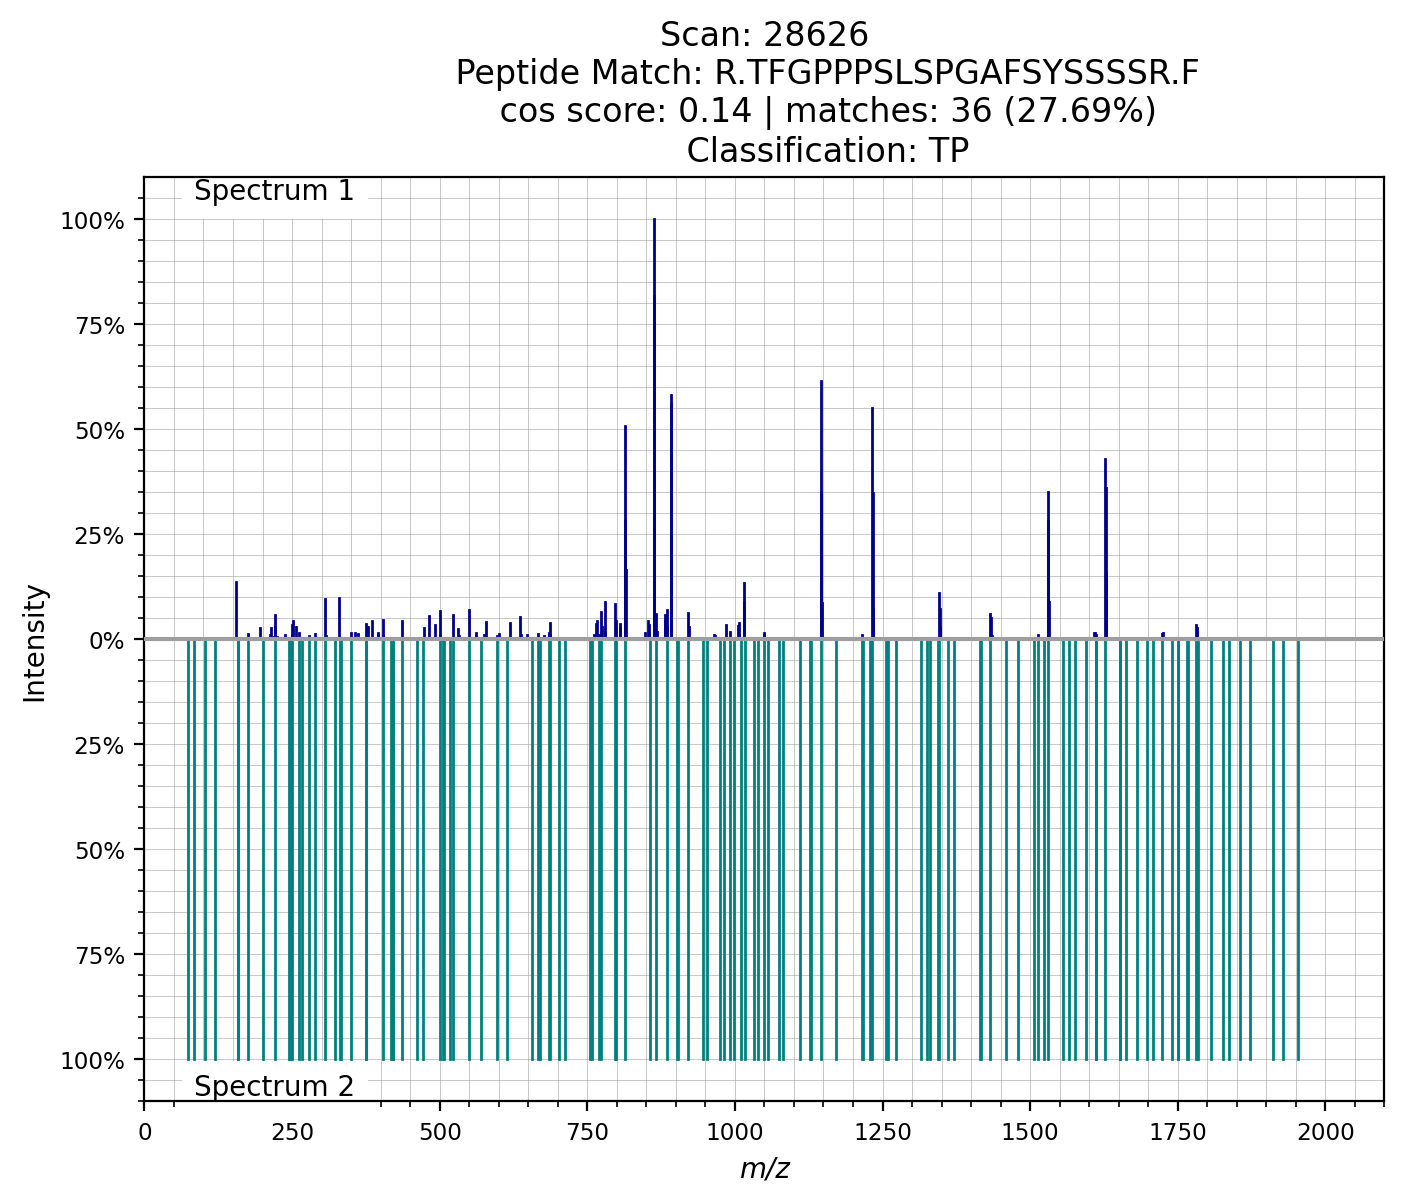

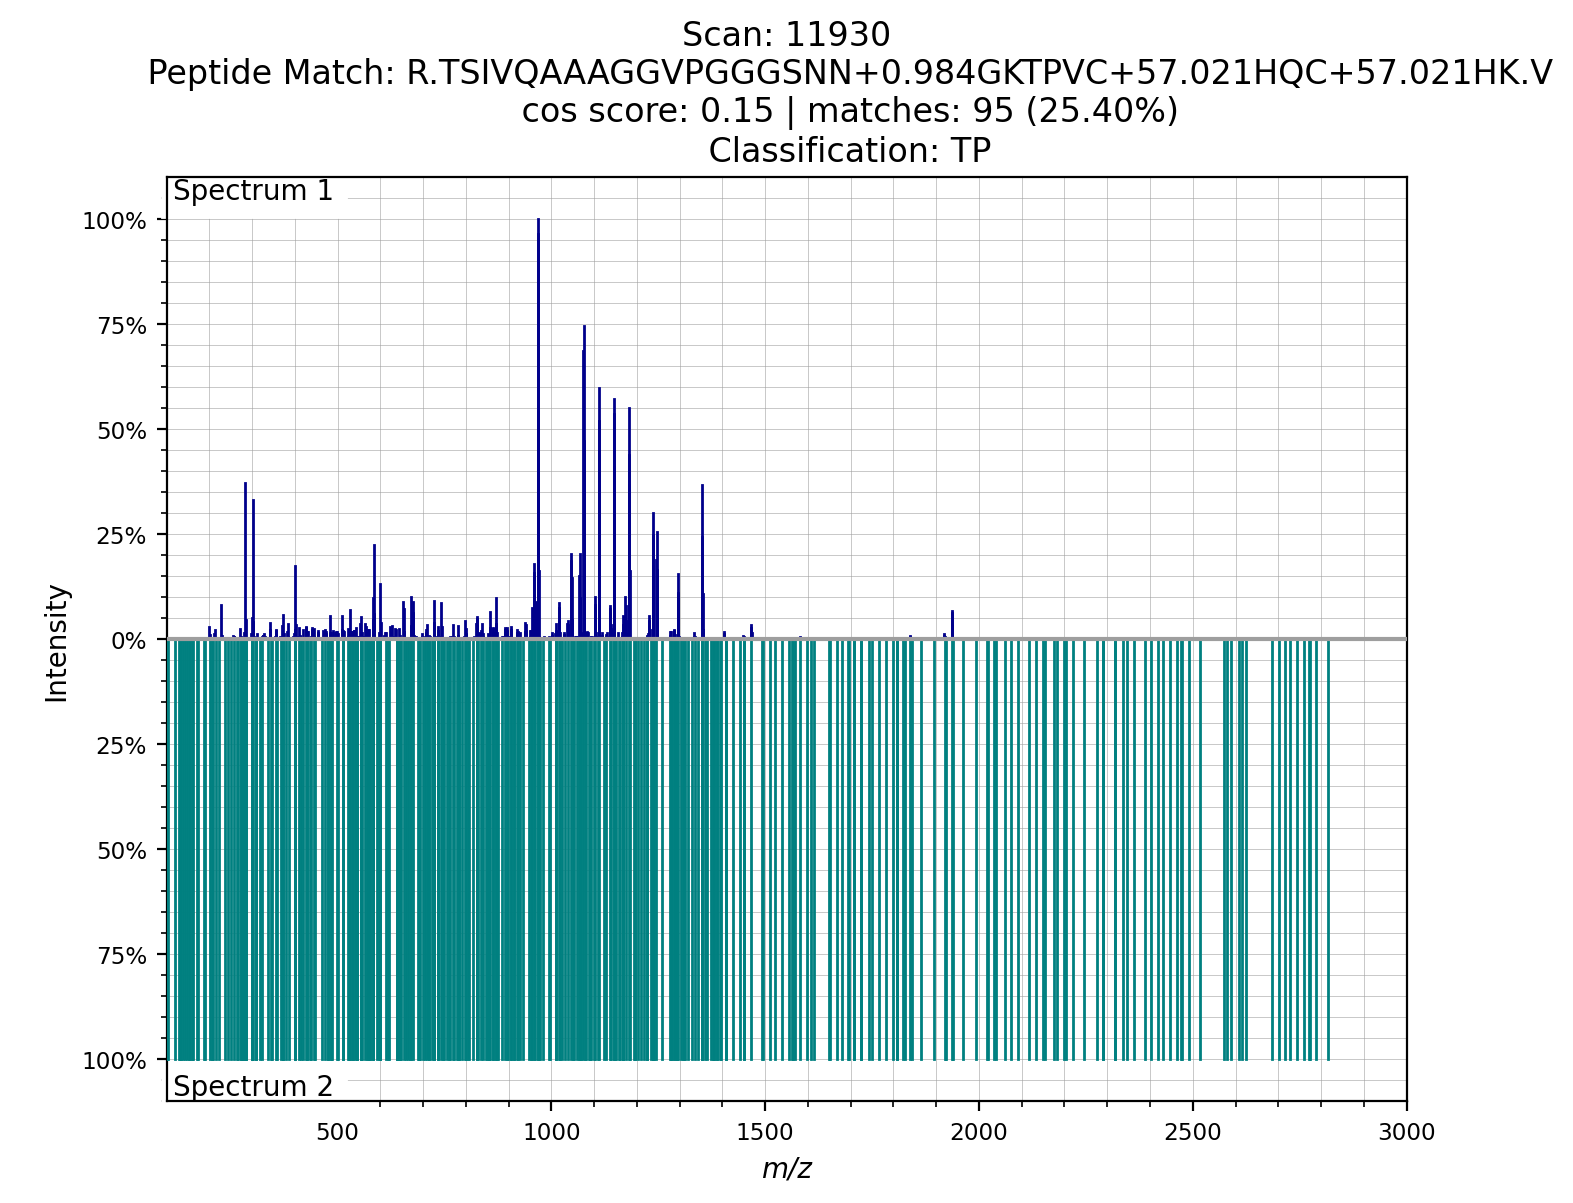

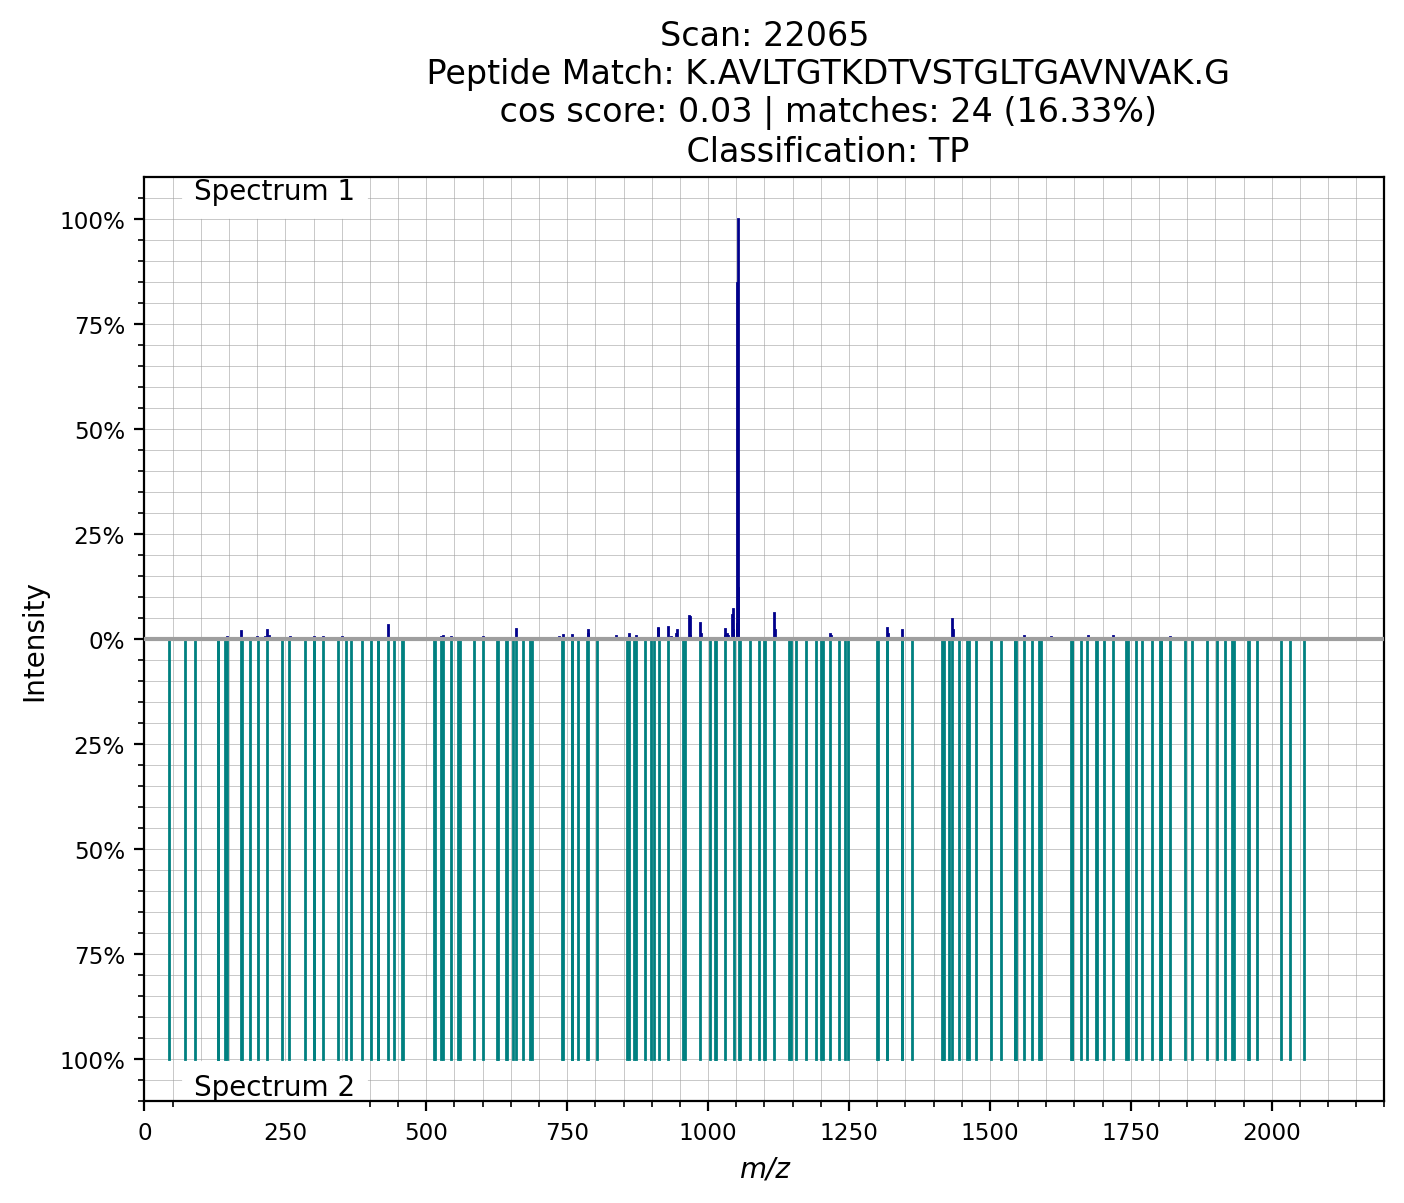

In [10]:
mzml_file = '01075_G01_P010693_S00_N07_R1.mzML'
spectrums = [(17338, 'R.AIGGGLSSVGGGSSTIKYTTTSSSSR.K'),
 (8220, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (20555, 'K.TVLTGTKDTVC+57.021SGVTGAVNVAK.G'),
 (8223, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (8057, 'R.VHGPGIQSGTTNKPNKFTVETR.G')]
# plot_spectrums(mzml_file, spectrums)

fn_spectrums = [(17338, 'R.AIGGGLSSVGGGSSTIKYTTTSSSSR.K'),
 (8220, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (20555, 'K.TVLTGTKDTVC+57.021SGVTGAVNVAK.G')]
plot_spectrums(mzml_file, fn_spectrums, classification="FN")

fp_spectrums = [(17338, 'E.+42.011RRISSPAEETWITC+57.021EDRIR.V'),
 (8220, 'R.PRGLQHSVGAFEQ+0.984RLARAFAR.G'),
 (8220, 'P.+42.011PPLIILSHIVSLFC+57.021C+57.021IC+57.021KR.R')]
plot_spectrums(mzml_file, fp_spectrums, classification="FP")

tp_spectrums = [(28626, 'R.TFGPPPSLSPGAFSYSSSSR.F'),
 (11930, 'R.TSIVQAAAGGVPGGGSNN+0.984GKTPVC+57.021HQC+57.021HK.V'),
 (22065, 'K.AVLTGTKDTVSTGLTGAVNVAK.G')]
plot_spectrums(mzml_file, tp_spectrums, classification="TP")

2023-06-04 02:06:14,765:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-06-04 02:06:15,045:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-06-04 02:06:15,306:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


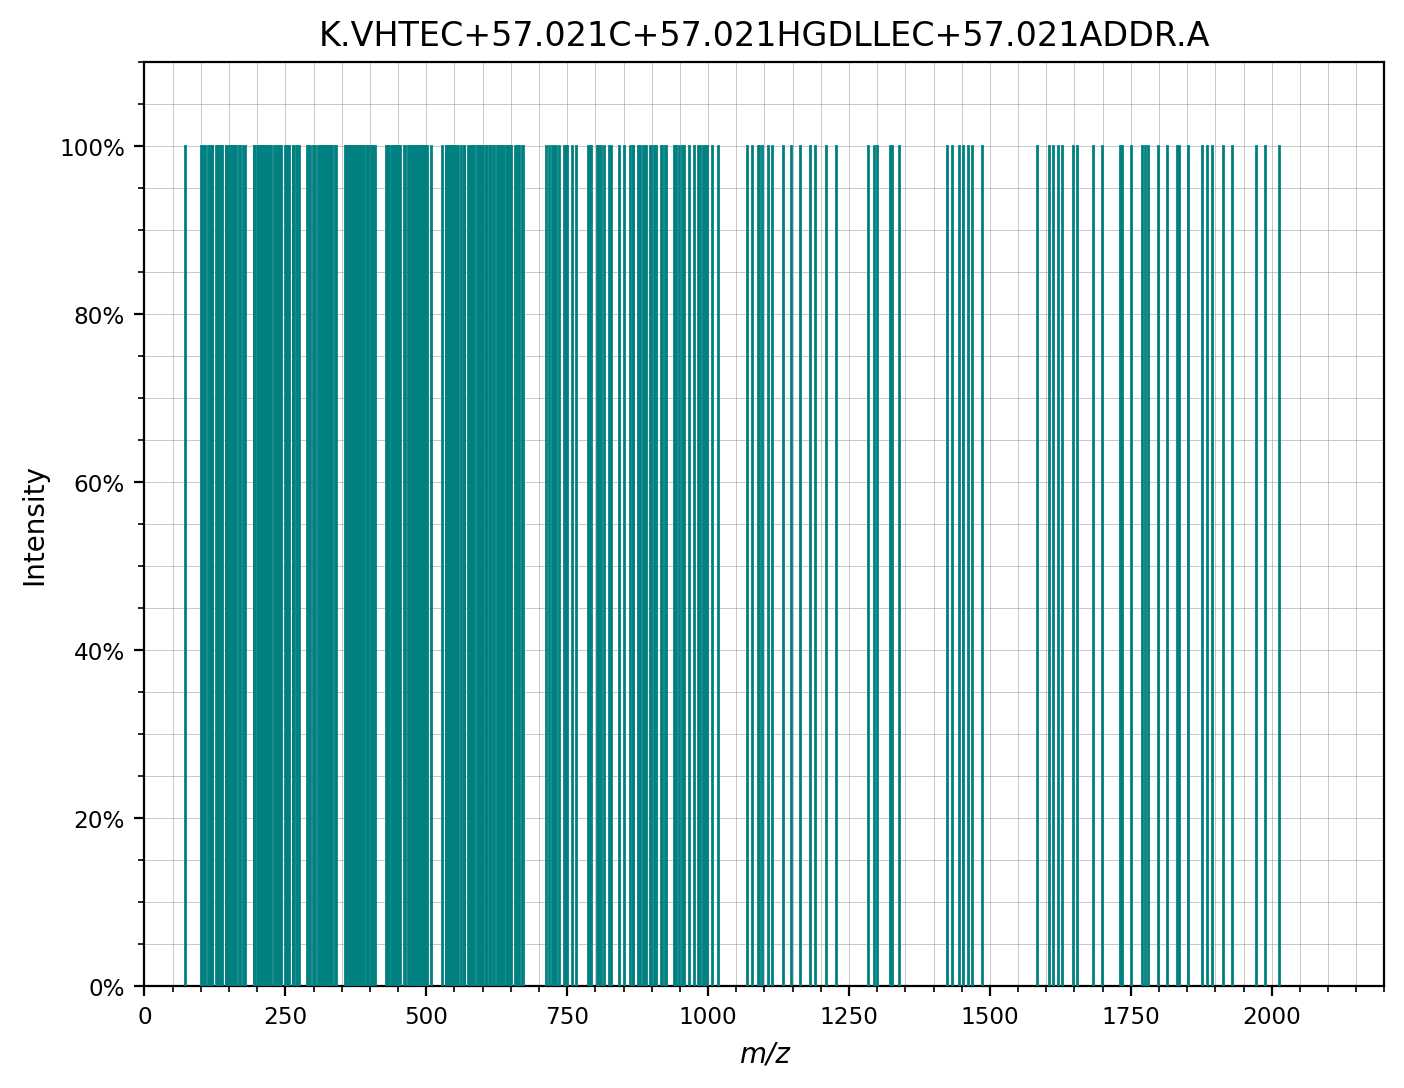

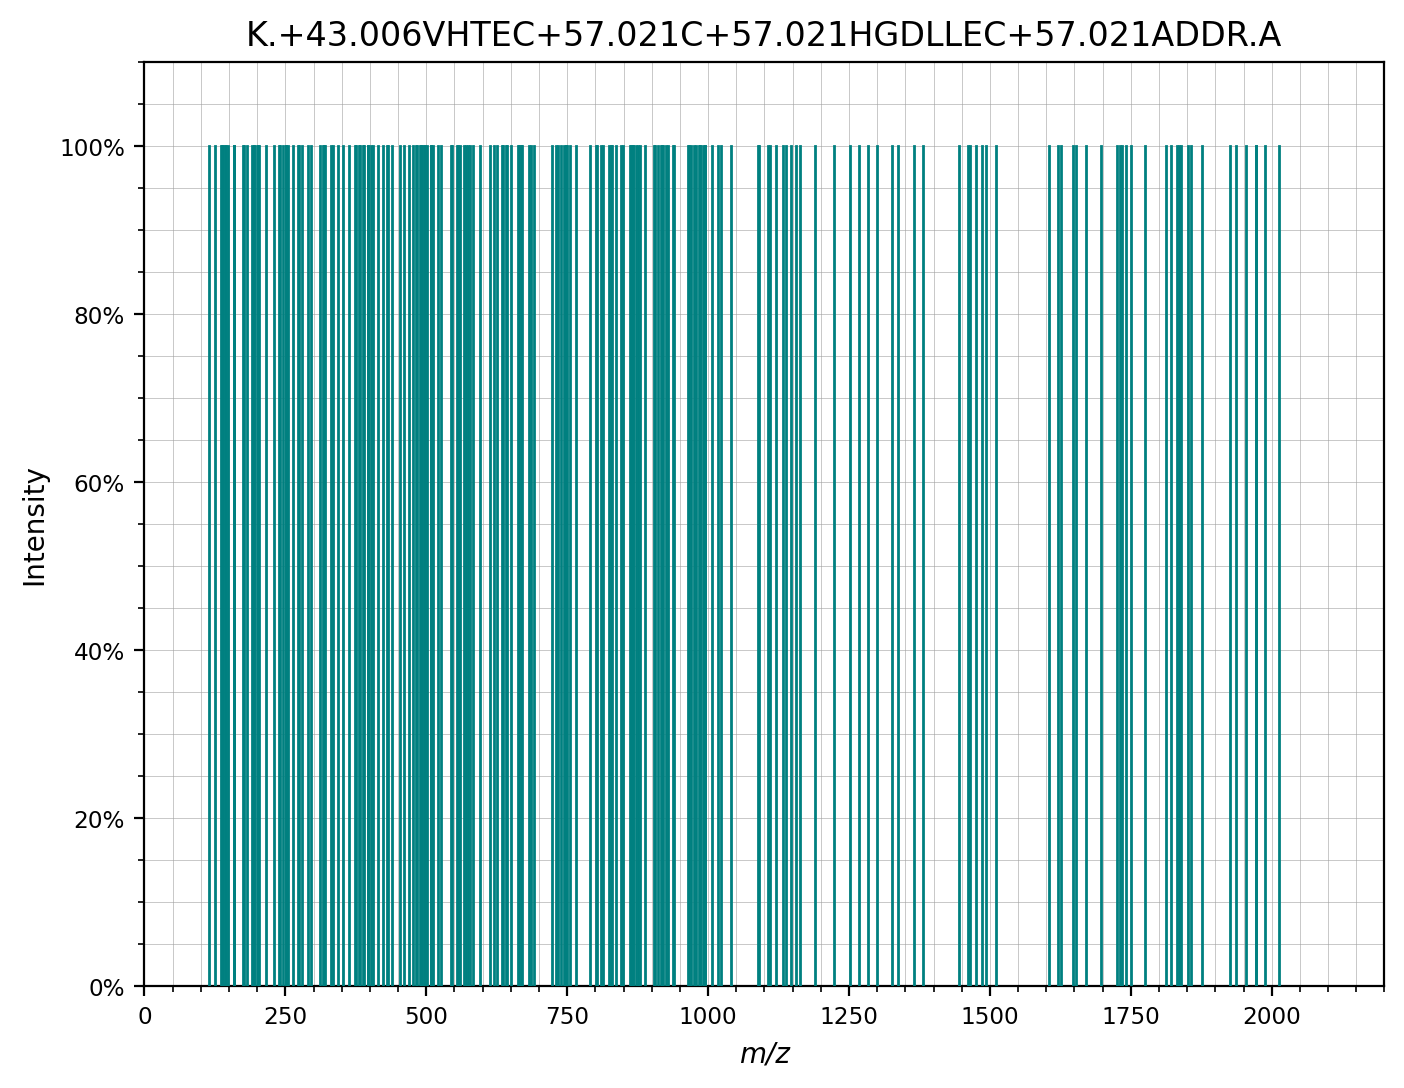

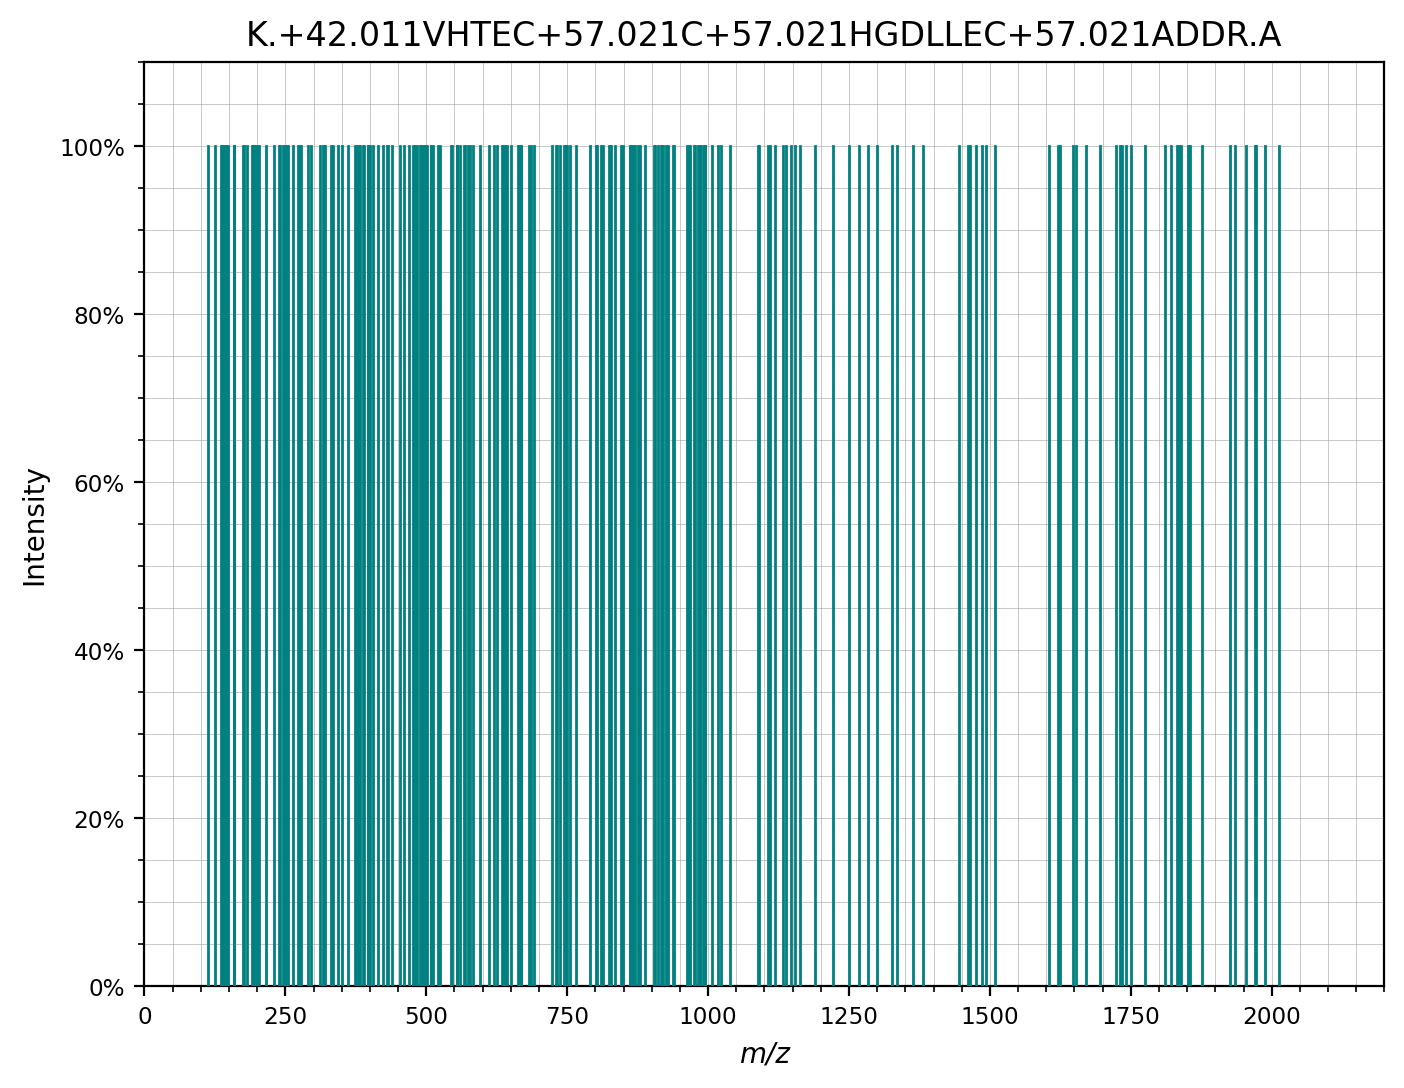

In [11]:
for peptide in ['K.VHTEC+57.021C+57.021HGDLLEC+57.021ADDR.A', 'K.+43.006VHTEC+57.021C+57.021HGDLLEC+57.021ADDR.A', 'K.+42.011VHTEC+57.021C+57.021HGDLLEC+57.021ADDR.A']:
        mz_theo = test_theospecs[peptide]['mz_arr']
        intensity_theo = test_theospecs[peptide]['intensity_arr']
        ion_info_theo = test_theospecs[peptide]['ion_name_arr']

        mz_theo = np.array([float(x) for x in mz_theo])
        intensity_theo = np.array([float(x) for x in intensity_theo])

        spectrum_theo = Spectrum(mz=mz_theo,
                intensities=intensity_theo,
                metadata={'id': 'theospec'})

        spectrum_theo.plot()
        plt.title(f"""{peptide}""")
        plt.savefig(f'../data/eda/dupe-{peptide}.png', bbox_inches='tight')
        # plt.show()

In [14]:
peptides = ['K.VHTEC+57.021C+57.021HGDLLEC+57.021ADDR.A', 'K.+43.006VHTEC+57.021C+57.021HGDLLEC+57.021ADDR.A']

mz1 = test_theospecs[peptides[0]]['mz_arr']
intensity1 = test_theospecs[peptides[0]]['intensity_arr']
mz1 = np.array([float(x) for x in mz1])
intensity1 = np.array([float(x) for x in intensity1])
spectrum1 = Spectrum(mz=mz1,
        intensities=intensity1,
        metadata={'id': 'theospec'})

mz2 = test_theospecs[peptides[1]]['mz_arr']
intensity2 = test_theospecs[peptides[1]]['intensity_arr']
mz2 = np.array([float(x) for x in mz2])
intensity2 = np.array([float(x) for x in intensity2])
spectrum2 = Spectrum(mz=mz2,
        intensities=intensity2,
        metadata={'id': 'theospec'})

# Calculate cosine similarity between them
cosine_greedy = CosineGreedy(tolerance=0.2)
score_orig = cosine_greedy.pair(spectrum1, spectrum2)
print(score_orig)



2023-06-04 02:07:14,298:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-06-04 02:07:14,299:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
(0.43683863, 111)
